In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import sys
sys.path.append('/content/gdrive/MyDrive/Colab/CV_HW1')
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import camera_calibration_show_extrinsics as show
from PIL import Image

Start finding chessboard corners...
find the chessboard corners of /content/gdrive/MyDrive/Colab/CV_HW1/data/0000.jpg
find the chessboard corners of /content/gdrive/MyDrive/Colab/CV_HW1/data/0002.jpg
find the chessboard corners of /content/gdrive/MyDrive/Colab/CV_HW1/data/0009.jpg
find the chessboard corners of /content/gdrive/MyDrive/Colab/CV_HW1/data/0005.jpg
find the chessboard corners of /content/gdrive/MyDrive/Colab/CV_HW1/data/0008.jpg
find the chessboard corners of /content/gdrive/MyDrive/Colab/CV_HW1/data/0003.jpg
find the chessboard corners of /content/gdrive/MyDrive/Colab/CV_HW1/data/0004.jpg
find the chessboard corners of /content/gdrive/MyDrive/Colab/CV_HW1/data/0006.jpg
find the chessboard corners of /content/gdrive/MyDrive/Colab/CV_HW1/data/0001.jpg
find the chessboard corners of /content/gdrive/MyDrive/Colab/CV_HW1/data/0007.jpg
Camera calibration...


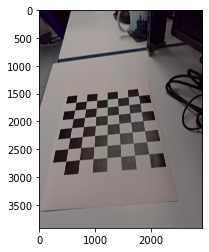

In [ ]:
corner_x = 7
corner_y = 7
objp = np.zeros((corner_x*corner_y,3), np.float32)
objp[:,:2] = np.mgrid[0:corner_x, 0:corner_y].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('/content/gdrive/MyDrive/Colab/CV_HW1/data/*.jpg')

# Step through the list and search for chessboard corners
print('Start finding chessboard corners...')
for idx, fname in enumerate(images):
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    plt.imshow(gray)

    #Find the chessboard corners
    print('find the chessboard corners of',fname)
    ret, corners = cv2.findChessboardCorners(gray, (corner_x,corner_y), None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        cv2.drawChessboardCorners(img, (corner_x,corner_y), corners, ret)
        plt.imshow(img)

print('Camera calibration...')
img_size = (img.shape[1], img.shape[0])


In [ ]:
#calculate H of each picture by Pm=0
Homography_list=[]
for i in range(len(images)):
    P = np.zeros((corner_x*corner_y*2,9),np.float32)
    for j in range(corner_x*corner_y):
        u = j*2
        P_point = objpoints[i][j]+np.array([0,0,1])
        P[u,0:3] = P_point 
        P[u+1,3:6] = P_point 
        P[u,6:]= P_point * (-imgpoints[i][j,0,0])
        P[u+1,6:]= P_point *  (-imgpoints[i][j,0,1])
        
    _,_,V=np.linalg.svd(P)
    Homography = V[-1,:] / V[-1,-1]
    Homography = Homography.reshape((3,3))
    Homography_list.append(Homography)
    
print(Homography_list)

[array([[-4.6691360e+00, -2.9165247e+02,  2.3276489e+03],
       [ 2.8482581e+02,  7.7128105e+00,  1.2935424e+03],
       [-4.9533127e-03,  2.5835789e-03,  1.0000000e+00]], dtype=float32), array([[ 1.4939687e+02, -1.6956680e+02,  1.3927351e+03],
       [ 1.3912883e+02,  1.4412949e+02,  8.9741913e+02],
       [-8.5133966e-03, -7.9243267e-03,  1.0000000e+00]], dtype=float32), array([[-1.0990662e+02, -2.0828444e+02,  2.4099414e+03],
       [ 1.5071330e+02,  2.9021612e+01,  9.4747925e+02],
       [-3.8140938e-02,  2.4994250e-02,  1.0000000e+00]], dtype=float32), array([[ 1.2858783e+02, -1.4693990e+02,  1.3691879e+03],
       [ 1.5489211e+01,  6.6035446e+01,  1.1680330e+03],
       [-2.5575157e-02, -3.3910803e-02,  1.0000000e+00]], dtype=float32), array([[ 2.6957431e+02, -6.2537457e+01,  1.2873856e+03],
       [ 1.7032076e+01,  1.8166949e+02,  7.1803259e+02],
       [ 7.7610044e-03, -3.4270849e-02,  1.0000000e+00]], dtype=float32), array([[ 2.4882333e+02, -1.0838771e+02,  1.3675416e+03],
  

In [ ]:
#calculate B by Vb=0 
#b = argmin Vb
V=np.zeros((len(images)*2,6),np.float32)
for pic in range(len(images)):
    Homography=Homography_list[pic]
    V[pic*2,:]=np.array([Homography[0,0] * Homography[0,1]                                ,
                         Homography[0,0] * Homography[1,1] + Homography[0,1] * Homography[1,0],
                         Homography[0,0] * Homography[2,1] + Homography[2,0] * Homography[0,1],
                         Homography[1,0] * Homography[1,1]                                    ,
                         Homography[1,0] * Homography[2,1] + Homography[2,0] * Homography[1,1],
                         Homography[2,0] * Homography[2,1]]                                   ,
                         np.float32)
    V[pic*2+1,:]=np.array([Homography[0,0]**2 - Homography[0,1]**2                                ,
                           2*(Homography[0,0] * Homography[1,0] - Homography[0,1]*Homography[1,1]),
                           2*(Homography[0,0] * Homography[2,0] - Homography[0,1]*Homography[2,1]),
                           Homography[1,0]**2 - Homography[1,1]**2                                ,
                           2*(Homography[1,0] * Homography[2,0] - Homography[1,1]*Homography[2,1]),
                           Homography[2,0]**2 - Homography[2,1]**2]                               ,
                           np.float32)
_,_,V=np.linalg.svd(V)
B=V[-1,:]
B=np.array([[B[0],B[1],B[2]],
      [B[1],B[3],B[4]],
      [B[2],B[4],B[5]]],np.float32)
# change B to positive definite 
if B[0,0]<0:
    B=-B
print(B)

[[ 6.3179826e-08  6.6501221e-10 -9.4169962e-05]
 [ 6.6501221e-10  6.5124667e-08 -9.2691742e-05]
 [-9.4169962e-05 -9.2691742e-05  1.0000000e+00]]


In [ ]:
#calculate K from B by cholesky 
K_inv=np.linalg.cholesky(B).T
K=np.linalg.inv(K_inv)
K/=K[-1,-1]
print(K)

[[ 3.4003372e+03 -3.5254375e+01  1.4756842e+03]
 [ 0.0000000e+00  3.3493599e+03  1.4082283e+03]
 [ 0.0000000e+00  0.0000000e+00  1.0000000e+00]]


In [ ]:
#calculate [R t] from K and H
extrinsics=np.zeros((len(images),6))
for i in range(len(Homography_list)):
    Homography = Homography_list[i]
    _lambda = 1 / np.linalg.norm(K_inv @ Homography[:,0])
    ex = _lambda * K_inv @ Homography
    r1 = ex[:,0:1]
    r2 = ex[:,1:2]
    r3 = np.cross(r1.T,r2.T).T

    R = np.hstack((r1, r2, r3))
    t = ex[:,2:3]
    rot_vec,_ = cv2.Rodrigues(R)
    extrinsics[i,:] = np.concatenate((rot_vec,t)).reshape(-1)

print(extrinsics)

[[-2.07081363e-02  6.77474961e-02  1.55357718e+00  2.86666727e+00
  -3.92321110e-01  1.14575949e+01]
 [-1.65500551e-01  7.62379318e-02  7.65082061e-01 -3.90638828e-01
  -2.29354525e+00  1.50387077e+01]
 [-2.10209787e-01  7.15533793e-01  1.63054299e+00  3.71642923e+00
  -1.87044239e+00  1.35969563e+01]
 [-7.97917187e-01  3.25813621e-01  4.55799937e-01 -5.58236122e-01
  -1.24858665e+00  1.74106922e+01]
 [-4.59216148e-01 -9.85870585e-02  2.99060531e-02 -7.53311157e-01
  -2.69910359e+00  1.30981236e+01]
 [-5.47954500e-01  1.23339361e-02  1.50528923e-01 -4.63452339e-01
  -3.82656956e+00  1.33249130e+01]
 [-9.68520105e-01 -5.58888137e-01 -1.06417048e+00 -4.07213449e+00
   4.81449366e+00  1.44851217e+01]
 [-1.48666263e-01 -1.44240066e-01  1.29022598e-01 -1.85202408e+00
  -2.48724341e+00  1.16916304e+01]
 [-1.71178952e-01  5.69162033e-02  1.07480216e+00  1.08607864e+00
  -2.17294407e+00  1.46248922e+01]
 [-5.74261844e-01  7.00736582e-01  1.38257146e+00  1.68667507e+00
   7.81466007e-01  1.8066

Show the camera extrinsics


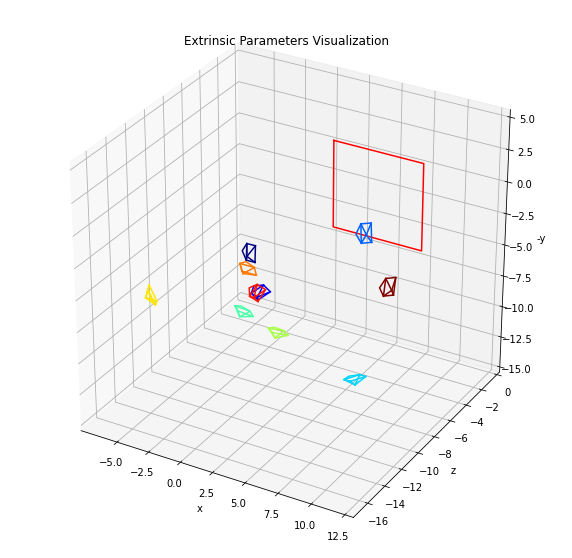

In [ ]:
# show the camera extrinsics
print('Show the camera extrinsics')
# plot setting
# You can modify it for better visualization
fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')
# camera setting
camera_matrix = K
cam_width = 0.064/0.1
cam_height = 0.032/0.1
scale_focal = 1600
# chess board setting
board_width = 7
board_height = 7
square_size = 1
# display
# True -> fix board, moving cameras
# False -> fix camera, moving boards
min_values, max_values = show.draw_camera_boards(ax, camera_matrix, cam_width, cam_height,
                                                scale_focal, extrinsics, board_width,
                                                board_height, square_size, True)

X_min = min_values[0]
X_max = max_values[0]
Y_min = min_values[1]
Y_max = max_values[1]
Z_min = min_values[2]
Z_max = max_values[2]
max_range = np.array([X_max-X_min, Y_max-Y_min, Z_max-Z_min]).max() / 2.0

mid_x = (X_max+X_min) * 0.5
mid_y = (Y_max+Y_min) * 0.5
mid_z = (Z_max+Z_min) * 0.5
ax.set_xlim(mid_x - max_range, mid_x + max_range)
ax.set_ylim(mid_y - max_range, 0)
ax.set_zlim(mid_z - max_range, mid_z + max_range)

ax.set_xlabel('x')
ax.set_ylabel('z')
ax.set_zlabel('-y')
ax.set_title('Extrinsic Parameters Visualization')
#plt.savefig('opencv_ourdata_Extrinsic Parameters Visualization.png')
plt.show()